### Distribution of datasets:

For 1980-2000 and 2060-2080 and for UKCP18 and EuroCORDEX models:
- Key input variables (hurs, tas, pr, sfcWind)
- Key output variables (fwi, dsr)

(24 images)

###### Preliminaries:

In [1]:
import scipy.stats
import math
import xarray
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import matplotlib.lines as lines

def get_cordex_addresses():
    models = pd.read_csv('cordex_models.txt', sep='\t')

    # Getting file strings:
        # Directories:
    root = '/data/met/ukcordex/'
    directories = [root + models['GCM'][i] + '/' +
                   models['RCM'][i] + '/' +
                   models['Ensemble'][i] + '/dmo/'
                   for i in range(models.shape[0])]

        # Filenames:
    #feat. clunky for loops and error handling!
    tas_files  = []
    hurs_files = []
    pr_files   = []
    wind_files = []
    err_indexs = []
    print(type(err_indexs))
    for i in range(models.shape[0]):
        try:
            for f_name in os.listdir(directories[i]):
                if f_name.startswith('tas_'):
                    tas_files.append(str(f_name))
                if f_name.startswith('hurs_'):
                    hurs_files.append(str(f_name))
                if f_name.startswith('sfcWind_'):
                    wind_files.append(str(f_name))
                if f_name.startswith('pr_'):
                    pr_files.append(str(f_name))

        except OSError as error:
            print(f'Inelligible directory at: {directories[i]}')
            err_indexs.append(int(i))


    for i in range(len(err_indexs)):
        del directories[err_indexs[i]]
    
    return directories,tas_files,hurs_files,wind_files,pr_files

###### EuroCORDEX:

(100,)
(100,)
(100,)
(100,)


<BarContainer object of 100 artists>

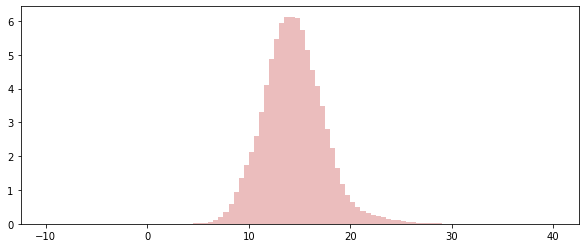

In [38]:
print(tas_hist_80.shape)
print(weights.shape)
print((tas_hist_80*weights).shape)
print(center_80.shape)
#plt.bar(center_80, tas_hist_80*weights, align='center', width=width_80, alpha=0.4,color='indianred')\
center = center_80
plt.bar(center_80, tas_hist_80*weights, align='center', width=width_80, alpha=0.4,color='indianred')

In [26]:
directories,tas_files,hurs_files,wind_files,pr_files = get_cordex_addresses()

region_data  = xarray.open_dataset('/home/theo/data/ukcp18-uk-land-region-rll.nc')
region_mask = region_data.admin_region
region_mask = np.nan_to_num(region_mask)
mask = np.logical_not(region_mask == 0).astype(int)

tas_hist_80 = 0
#hur_hist_80 = 0
#wnd_hist_80 = 0
#prc_hist_80 = 0
#fwi_hist_80 = 0
#dsr_hist_80 = 0
tas_hist_60 = 0
#hur_hist_60 = 0
#wnd_hist_60 = 0
#prc_hist_60 = 0
#fwi_hist_60 = 0
#dsr_hist_60 = 0

# Loading Data:
for i in range(1,len(directories)): # files
    print(f'Model {i+1} of {len(directories)}')
    # Loading data
    tas_data  = xarray.open_dataset(directories[i] + tas_files[i], engine = "netcdf4")
    temperature = np.array(tas_data.tas[:,:,:]) - 273.15
    temperature = np.einsum('ijk,jk->ijk', temperature, mask)
    #hurs_data  = xarray.open_dataset(directories[i] + hurs_files[i], engine = "netcdf4")
    #r_hum = np.array(hurs_data.hurs[:,:,:])
    #r_hum = np.einsum('ijk,jk->ijk', r_hum, mask)
    #wind_data  = xarray.open_dataset(directories[i] + wind_files[i], engine = "netcdf4")
    #wind = np.array(wind_data.sfcWind[:,:,:])*3.6
    #wind = np.einsum('ijk,jk->ijk', wind, mask)
    #pr_data  = xarray.open_dataset(directories[i] + pr_files[i], engine = "netcdf4")
    #rain = np.array(pr_data.pr[:,:,:])*86400
    #rain = np.einsum('ijk,jk->ijk', rain, mask)
    #fwi = np.load(f'/data/met/fwi/ukcordex_new_fwi_{i+1}.npy')[0,:,:,:]
    #fwi = np.einsum('ijk,jk->ijk', fwi, mask)
    #dsr = 0.0272 * fwi ** 1.77
    #dsr = np.einsum('ijk,jk->ijk', dsr, mask)
    length = temperature.shape[0]
    
    
    try:
        years = np.array(pd.to_datetime(np.array(tas_data.time)).year)
        months = np.array(pd.to_datetime(np.array(tas_data.time)).month)
    except:
        years = np.vectorize(lambda x: x.year)(np.array(tas_data.time))
        months = np.vectorize(lambda x: x.month)(np.array(tas_data.time))
        
    del tas_data
    #del tas_data,hurs_data,wind_data,pr_data
    
    # 1980-2000:
    year_inds = np.where(years <= 2000)
    summer_inds=np.concatenate((np.where(months == 6)[0],
                                np.where(months == 7)[0],
                                np.where(months == 8)[0]),
                                axis = 0)
    inds = np.intersect1d(year_inds,summer_inds)
    
    hist,tas_bins = np.histogram(temperature[inds,:,:], bins=100, range=(0,35))
    tas_hist_80 = tas_hist_80 + hist
    #del hist
    #hist,hur_bins = np.histogram(r_hum[inds,:,:], bins=100, range=(60,100))
    #hur_hist_80 = hur_hist_80 + hist
    #del hist
    #hist,wnd_bins = np.histogram(wind[inds,:,:], bins=100, range=(0,80))
    #wnd_hist_80 = wnd_hist_80 + hist
    #del hist
    #hist,prc_bins = np.histogram(rain[inds,:,:], bins=100, range=(0,80))
    #prc_hist_80 = prc_hist_80 + hist
    #del hist
    #hist,fwi_bins = np.histogram(fwi[inds,:,:], bins=100, range=(0,40))
    #fwi_hist_80 = fwi_hist_80 + hist
    #del hist
    #hist,dsr_bins = np.histogram(dsr[inds,:,:], bins=100, range=(0,8))
    #dsr_hist_80 = dsr_hist_80 + hist
    #del hist
    
    del year_inds,summer_inds,inds
    # 2060-2080:
    year_inds = np.where(years >= 2060)
    summer_inds=np.concatenate((np.where(months == 6)[0],
                                np.where(months == 7)[0],
                                np.where(months == 8)[0]),
                                axis = 0)
    inds = np.intersect1d(year_inds,summer_inds)

    hist,bins = np.histogram(temperature[inds,:,:], bins=100, range=(0,35))
    tas_hist_60 = tas_hist_60 + hist
    #del hist,bins
    #hist,bins = np.histogram(r_hum[inds,:,:], bins=100, range=(60,100))
    #hur_hist_60 = hur_hist_60 + hist
    #del hist,bins
    #hist,bins = np.histogram(wind[inds,:,:], bins=100, range=(0,80))
    #wnd_hist_60 = wnd_hist_60 + hist
    #del hist,bins
    #hist,bins = np.histogram(rain[inds,:,:], bins=100, range=(0,80))
    #prc_hist_60 = prc_hist_60 + hist
    #del hist,bins
    #hist,bins = np.histogram(fwi[inds,:,:], bins=100, range=(0,40))
    #fwi_hist_60 = fwi_hist_60 + hist
    #del hist,bins
    #hist,bins = np.histogram(dsr[inds,:,:], bins=100, range=(0,8))
    #dsr_hist_60 = dsr_hist_60 + hist
    #del hist,bins
    del year_inds,summer_inds,inds,temperature
    #del year_inds,summer_inds,inds,temperature,r_hum,wind,rain,fwi,dsr
    print(f'FWI max bin is now: {np.max(fwi_hist_60)}')

<class 'list'>
Model 2 of 49
FWI max bin is now: 2331097649
Model 3 of 49
FWI max bin is now: 2331097649
Model 4 of 49
FWI max bin is now: 2331097649
Model 5 of 49
FWI max bin is now: 2331097649
Model 6 of 49
FWI max bin is now: 2331097649
Model 7 of 49
FWI max bin is now: 2331097649
Model 8 of 49
FWI max bin is now: 2331097649
Model 9 of 49
FWI max bin is now: 2331097649
Model 10 of 49
FWI max bin is now: 2331097649
Model 11 of 49
FWI max bin is now: 2331097649
Model 12 of 49
FWI max bin is now: 2331097649
Model 13 of 49
FWI max bin is now: 2331097649
Model 14 of 49
FWI max bin is now: 2331097649
Model 15 of 49
FWI max bin is now: 2331097649
Model 16 of 49
FWI max bin is now: 2331097649
Model 17 of 49
FWI max bin is now: 2331097649
Model 18 of 49
FWI max bin is now: 2331097649
Model 19 of 49
FWI max bin is now: 2331097649
Model 20 of 49
FWI max bin is now: 2331097649
Model 21 of 49
FWI max bin is now: 2331097649
Model 22 of 49
FWI max bin is now: 2331097649
Model 23 of 49
FWI max bin 

In [27]:
np.save('/home/theo/outdata/3.1.outdata/tas_hist_60',tas_hist_60)
#np.save('/home/theo/outdata/3.1.outdata/hur_hist_60',hur_hist_60)
#np.save('/home/theo/outdata/3.1.outdata/wnd_hist_60',wnd_hist_60)
#np.save('/home/theo/outdata/3.1.outdata/prc_hist_60',prc_hist_60)
#np.save('/home/theo/outdata/3.1.outdata/fwi_hist_60',fwi_hist_60)
#np.save('/home/theo/outdata/3.1.outdata/dsr_hist_60',dsr_hist_60)

np.save('/home/theo/outdata/3.1.outdata/tas_hist_80',tas_hist_80)
#np.save('/home/theo/outdata/3.1.outdata/hur_hist_80',hur_hist_80)
#np.save('/home/theo/outdata/3.1.outdata/wnd_hist_80',wnd_hist_80)
#np.save('/home/theo/outdata/3.1.outdata/prc_hist_80',prc_hist_80)
#np.save('/home/theo/outdata/3.1.outdata/fwi_hist_80',fwi_hist_80)
#np.save('/home/theo/outdata/3.1.outdata/dsr_hist_80',dsr_hist_80)

np.save('/home/theo/outdata/3.1.outdata/tas_bins',tas_bins)
#np.save('/home/theo/outdata/3.1.outdata/hur_bins',hur_bins)
#np.save('/home/theo/outdata/3.1.outdata/wnd_bins',wnd_bins)
#np.save('/home/theo/outdata/3.1.outdata/prc_bins',prc_bins)
#np.save('/home/theo/outdata/3.1.outdata/fwi_bins',fwi_bins)
#np.save('/home/theo/outdata/3.1.outdata/dsr_bins',dsr_bins)

In [2]:
tas_hist_60 = np.load('/home/theo/outdata/3.1.outdata/tas_hist_60.npy')
hur_hist_60 = np.load('/home/theo/outdata/3.1.outdata/hur_hist_60.npy')
wnd_hist_60 = np.load('/home/theo/outdata/3.1.outdata/wnd_hist_60.npy')
prc_hist_60 = np.load('/home/theo/outdata/3.1.outdata/prc_hist_60.npy')
fwi_hist_60 = np.load('/home/theo/outdata/3.1.outdata/fwi_hist_60.npy')
dsr_hist_60 = np.load('/home/theo/outdata/3.1.outdata/dsr_hist_60.npy')

tas_hist_80 = np.load('/home/theo/outdata/3.1.outdata/tas_hist_80.npy')
hur_hist_80 = np.load('/home/theo/outdata/3.1.outdata/hur_hist_80.npy')
wnd_hist_80 = np.load('/home/theo/outdata/3.1.outdata/wnd_hist_80.npy')
prc_hist_80 = np.load('/home/theo/outdata/3.1.outdata/prc_hist_80.npy')
fwi_hist_80 = np.load('/home/theo/outdata/3.1.outdata/fwi_hist_80.npy')
dsr_hist_80 = np.load('/home/theo/outdata/3.1.outdata/dsr_hist_80.npy')

tas_bins = np.load('/home/theo/outdata/3.1.outdata/tas_bins.npy')
hur_bins = np.load('/home/theo/outdata/3.1.outdata/hur_bins.npy')
wnd_bins = np.load('/home/theo/outdata/3.1.outdata/wnd_bins.npy')
prc_bins = np.load('/home/theo/outdata/3.1.outdata/prc_bins.npy')
fwi_bins = np.load('/home/theo/outdata/3.1.outdata/fwi_bins.npy')
dsr_bins = np.load('/home/theo/outdata/3.1.outdata/dsr_bins.npy')

length = 10000000000

In [3]:
print(directories[5]+tas_files[5])

NameError: name 'directories' is not defined

In [23]:

directories,tas_files,hurs_files,wind_files,pr_files = get_cordex_addresses()
tas_hist_80 = np.zeros(100)
region_data  = xarray.open_dataset('/home/theo/data/ukcp18-uk-land-region-rll.nc')
region_mask = region_data.admin_region
region_mask = np.nan_to_num(region_mask)
mask = np.logical_not(region_mask == 0).astype(int)
for i in range(1,len(directories)): # files
    print(f'Model {i+1} of {len(directories)}')
    # Loading data
    tas_data  = xarray.open_dataset(directories[i] + tas_files[i], engine = "netcdf4")
    temperature = np.array(tas_data.tas[:,:,:]) - 273.15
    temperature = np.einsum('ijk,jk->ijk', temperature, mask)
    fwi = np.load(f'/data/met/fwi/ukcordex_new_fwi_{i+1}.npy')[0,:,:,:]
    fwi = np.einsum('ijk,jk->ijk', fwi, mask)
    try:
        years = np.array(pd.to_datetime(np.array(tas_data.time)).year)
        months = np.array(pd.to_datetime(np.array(tas_data.time)).month)
    except:
        years = np.vectorize(lambda x: x.year)(np.array(tas_data.time))
        months = np.vectorize(lambda x: x.month)(np.array(tas_data.time))
        
    del tas_data
    # 1980-2000:
    year_inds = np.where(years <= 2000)
    summer_inds=np.concatenate((np.where(months == 6)[0],
                                np.where(months == 7)[0],
                                np.where(months == 8)[0]),
                                axis = 0)
    inds = np.intersect1d(year_inds,summer_inds)
    
    tashist,tas_bins = np.histogram(temperature[inds,:,:], bins=100, range=(0,35))
    if i == 1:
        histotemp = tashist
    else:
        histotemp   = np.column_stack((histotemp,tashist))
    tas_hist_80 = tas_hist_80 + tashist
    
    fwihist,fwi_bins = np.histogram(fwi[inds,:,:], bins=100, range=(0,40))
    if i == 1:
        histofwi = fwihist
    else:
        histofwi   = np.column_stack((histofwi,fwihist))
    fwi_hist_80 = fwi_hist_80 + fwihist

np.save('/home/theo/outdata/3.1.outdata/histotemp',histotemp)
np.save('/home/theo/outdata/3.1.outdata/tas_hist_80',tas_hist_80)
np.save('/home/theo/outdata/3.1.outdata/tas_bins',tas_bins)
np.save('/home/theo/outdata/3.1.outdata/histofwi',histofwi)
np.save('/home/theo/outdata/3.1.outdata/fwi_hist_80',fwi_hist_80)
np.save('/home/theo/outdata/3.1.outdata/fwi_bins',fwi_bins)

<class 'list'>
Model 2 of 49
Model 3 of 49
Model 4 of 49
Model 5 of 49
Model 6 of 49
Model 7 of 49
Model 8 of 49
Model 9 of 49
Model 10 of 49
Model 11 of 49
Model 12 of 49
Model 13 of 49
Model 14 of 49
Model 15 of 49
Model 16 of 49
Model 17 of 49
Model 18 of 49
Model 19 of 49
Model 20 of 49
Model 21 of 49
Model 22 of 49
Model 23 of 49
Model 24 of 49
Model 25 of 49
Model 26 of 49
Model 27 of 49
Model 28 of 49
Model 29 of 49
Model 30 of 49
Model 31 of 49
Model 32 of 49
Model 33 of 49
Model 34 of 49
Model 35 of 49
Model 36 of 49
Model 37 of 49
Model 38 of 49
Model 39 of 49
Model 40 of 49
Model 41 of 49
Model 42 of 49
Model 43 of 49
Model 44 of 49
Model 45 of 49
Model 46 of 49
Model 47 of 49
Model 48 of 49
Model 49 of 49


In [31]:
fwi_hist_60 = fwi_hist_60/np.mean(fwi_hist_60)
fwi_hist_80 = fwi_hist_80/np.mean(fwi_hist_80)
print(np.where(fwi_hist_80>fwi_hist_60))

(array([0, 1]),)


[0.7666666666666666, 0.13333333333333333, 0.3, 0.75]


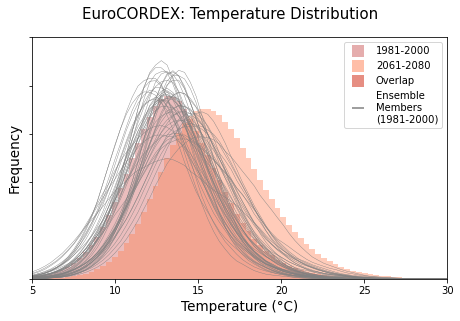

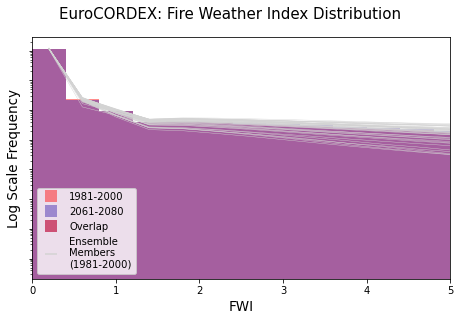

In [41]:
histotemp   = np.load('/home/theo/outdata/3.1.outdata/histotemp.npy')
tas_hist_60 = np.load('/home/theo/outdata/3.1.outdata/tas_hist_60.npy')
tas_bins    = np.load('/home/theo/outdata/3.1.outdata/tas_bins.npy')
histofwi    = np.load('/home/theo/outdata/3.1.outdata/histofwi.npy')
fwi_hist_60 = np.load('/home/theo/outdata/3.1.outdata/fwi_hist_60.npy')
fwi_bins    = np.load('/home/theo/outdata/3.1.outdata/fwi_bins.npy')
fwi_hist_60 = fwi_hist_60/np.mean(fwi_hist_60)
fwi_hist_80 = fwi_hist_80/np.mean(fwi_hist_80)

c1 = [205/255,92/255,92/255,255/(2*255)]   
c2 = [255/255,127/255,80/255,255/(2*255)]
c12 = mix_colors(c1,c2)
plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'EuroCORDEX: Temperature Distribution',fontsize=15)
for i in range(48):
    ax.plot((tas_bins[:-1] + tas_bins[1:]) / 2 ,45*histotemp[:,i], color = 'grey',linewidth = 0.4)
width_80 = 1 * (tas_bins[1] - tas_bins[0])
center_80 = (tas_bins[:-1] + tas_bins[1:]) / 2
weights = np.ones_like(tas_hist_80)
ax.set_yscale('linear')
line_80 = ax.bar(center_80, tas_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax.set_ylabel('Frequency',fontsize=13.5)
ax.set_xlabel('Temperature (°C)',fontsize=13.5)
ax.set_ylim(0,10000000)
ax.set_xlim(5,30)
width_60 = 1 * (tas_bins[1] - tas_bins[0])
center_60 = (tas_bins[:-1] + tas_bins[1:]) / 2
weights = np.ones_like(tas_hist_60)
line_60 = ax.bar(center_60, tas_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
leg4 = lines.Line2D([0], [0], linestyle='none', marker='_', markersize=12, markeredgecolor='grey',markeredgewidth=1.5)
ax.legend([leg1, leg2, leg3, leg4], ['1981-2000', '2061-2080', 'Overlap', 'Ensemble\nMembers\n(1981-2000)'])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/tas')



c1 = [1.0, 0.1, 0.1, 0.5]
c2 = [0.3, 0.2, 0.7, 0.5]
c12 = mix_colors(c1,c2)
print(c12)
plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'EuroCORDEX: Fire Weather Index Distribution',fontsize=15)
for i in range(48):
    ax.plot((fwi_bins[:-1] + fwi_bins[1:]) / 2 ,4.9*10**(-17)*histofwi[:,i], color = 'lightgrey',linewidth = 0.4)
width_80 = 1 * (fwi_bins[1] - fwi_bins[0])
center_80 = (fwi_bins[:-1] + fwi_bins[1:]) / 2
weights = np.ones_like(fwi_hist_80)/(length*8)
ax.set_yscale('log',base=10)
line_80 = ax.bar(center_80, fwi_hist_80*weights, align='center', width=width_80, color=c1)
ax.set_ylabel('Log Scale Frequency',fontsize=13.5)
ax.set_xlabel('FWI',fontsize=13.5)
ax.set_xlim(0,5)
width_60 = 1 * (fwi_bins[1] - fwi_bins[0])
center_60 = (fwi_bins[:-1] + fwi_bins[1:]) / 2
weights = np.ones_like(fwi_hist_60)/(length*8)
line_60 = ax.bar(center_60, fwi_hist_60*weights, align='center', width=width_60, color=c2)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
leg4 = lines.Line2D([0], [0], linestyle='none', marker='_', markersize=12, markeredgecolor='lightgrey',markeredgewidth=1.5)
ax.legend([leg1, leg2, leg3, leg4], ['1981-2000', '2061-2080', 'Overlap', 'Ensemble\nMembers\n(1981-2000)'])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/fwi')

In [4]:
def mix_colors(cf, cb):
    a = cb[-1] + cf[-1] * (1 - cb[-1])  # fixed alpha calculation
    r = (cf[0] * cf[-1] + cb[0] * cb[-1] * (1 - cf[-1])) / a
    g = (cf[1] * cf[-1] + cb[1] * cb[-1] * (1 - cf[-1])) / a
    b = (cf[2] * cf[-1] + cb[2] * cb[-1] * (1 - cf[-1])) / a
    return [r,g,b,a]

In [5]:
print(length)

10000000000


In [6]:
print(tas_hist_60.shape)

(100,)


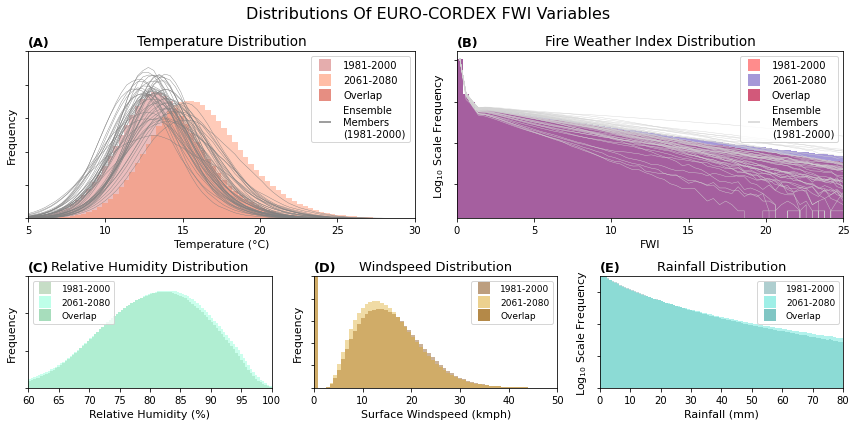

In [43]:
fig = plt.figure(figsize=(12, 6),tight_layout=True)

fig.suptitle('Distributions Of EURO-CORDEX FWI Variables',fontsize = 16)

widths = [1,1,1,1,1,1]
heights = [1.5, 1]
grid = fig.add_gridspec(ncols=6, nrows=2, width_ratios=widths,height_ratios=heights)

ax_1 = fig.add_subplot(grid[0,0:3])
c1 = [205/255,92/255,92/255,255/(2*255)]   
c2 = [255/255,127/255,80/255,255/(2*255)]
c12 = mix_colors(c1,c2)
ax_1.set_title(f'Temperature Distribution',fontsize=13.5)
for i in range(48):
    ax_1.plot((tas_bins[:-1] + tas_bins[1:]) / 2 ,45*histotemp[:,i], color = 'grey',linewidth = 0.4)
width_80 = 1 * (tas_bins[1] - tas_bins[0])
center_80 = (tas_bins[:-1] + tas_bins[1:]) / 2
weights = np.ones_like(tas_hist_80)
ax_1.set_yscale('linear')
line_80 = ax_1.bar(center_80, tas_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax_1.set_ylabel('Frequency',fontsize=11)
ax_1.set_xlabel('Temperature (°C)',fontsize=11)
ax_1.set_ylim(0,10000000)
ax_1.set_xlim(5,30)
width_60 = 1 * (tas_bins[1] - tas_bins[0])
center_60 = (tas_bins[:-1] + tas_bins[1:]) / 2
weights = np.ones_like(tas_hist_60)
line_60 = ax_1.bar(center_60, tas_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax_1.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
leg4 = lines.Line2D([0], [0], linestyle='none', marker='_', markersize=12, markeredgecolor='grey',markeredgewidth=1.5)
ax_1.legend([leg1, leg2, leg3, leg4], ['1981-2000', '2061-2080', 'Overlap', 'Ensemble\nMembers\n(1981-2000)'])
ax_1.annotate('(A)', xy=(0.00, 1.03), xycoords='axes fraction', size=13,weight='bold')


ax_2 = fig.add_subplot(grid[0,3:6])
c1 = [1.0, 0.1, 0.1, 0.5]
c2 = [0.3, 0.2, 0.7, 0.5]
c12 = mix_colors(c1,c2)
ax_2.set_title(f'Fire Weather Index Distribution',fontsize=13.5)
for i in range(48):
    ax_2.plot((fwi_bins[:-1] + fwi_bins[1:]) / 2 ,4.9*10**(-17)*histofwi[:,i], color = 'lightgrey',linewidth = 0.4)
width_80 = 1 * (fwi_bins[1] - fwi_bins[0])
center_80 = (fwi_bins[:-1] + fwi_bins[1:]) / 2
weights = np.ones_like(fwi_hist_80)/(length*8)
ax_2.set_yscale('log',base=10)
line_80 = ax_2.bar(center_80, fwi_hist_80*weights, align='center', width=width_80, color=c1)
ax_2.set_ylabel('Log$_{10}$ Scale Frequency',fontsize=11)
ax_2.set_xlabel('FWI',fontsize=11)
ax_2.set_xlim(0,25)
width_60 = 1 * (fwi_bins[1] - fwi_bins[0])
center_60 = (fwi_bins[:-1] + fwi_bins[1:]) / 2
weights = np.ones_like(fwi_hist_60)/(length*8)
line_60 = ax_2.bar(center_60, fwi_hist_60*weights, align='center', width=width_60, color=c2)
ax_2.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
leg4 = lines.Line2D([0], [0], linestyle='none', marker='_', markersize=12, markeredgecolor='lightgrey',markeredgewidth=1.5)
ax_2.legend([leg1, leg2, leg3, leg4], ['1981-2000', '2061-2080', 'Overlap', 'Ensemble\nMembers\n(1981-2000)'])
ax_2.annotate('(B)', xy=(0.00, 1.03), xycoords='axes fraction', size=13,weight='bold')


ax_3 = fig.add_subplot(grid[1,0:2])
c1 = [143/255,188/255,143/255,255/(2*255)]   
c2 = [127/255,255/255,212/255,255/(2*255)]
c12 = mix_colors(c1,c2)
ax_3.set_title(f'Relative Humidity Distribution',fontsize=13)
width_80 = 1 * (hur_bins[1] - hur_bins[0])
center_80 = (hur_bins[:-1] + hur_bins[1:]) / 2
weights = np.ones_like(hur_hist_80)
ax_3.set_yscale('linear')
line_80 = ax_3.bar(center_80, hur_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax_3.set_ylabel('Frequency',fontsize=11)
ax_3.set_xlabel('Relative Humidity (%)',fontsize=11)
ax_3.set_ylim(0,3000000)
ax_3.set_xlim(60,100)
width_60 = 1 * (hur_bins[1] - hur_bins[0])
center_60 = (hur_bins[:-1] + hur_bins[1:]) / 2
weights = np.ones_like(hur_hist_60)
line_60 = ax_3.bar(center_60, hur_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax_3.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax_3.legend([leg1, leg2, leg3], ['1981-2000', '2061-2080', 'Overlap'],fontsize = 9)
ax_3.annotate('(C)', xy=(0.00, 1.05), xycoords='axes fraction', size=13,weight='bold')

ax_4 = fig.add_subplot(grid[1,2:4])
c1 = [123/255,63/255,0/255,255/(2*255)]   
c2 = [218/255,165/255,32/255,255/(2*255)]
c12 = mix_colors(c1,c2)
ax_4.set_title(f'Windspeed Distribution',fontsize=13)
width_80 = 1 * (wnd_bins[1] - wnd_bins[0])
center_80 = (wnd_bins[:-1] + wnd_bins[1:]) / 2
weights = np.ones_like(wnd_hist_80)
ax_4.set_yscale('linear')
line_80 = ax_4.bar(center_80, wnd_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax_4.set_ylabel('Frequency',fontsize=11)
ax_4.set_xlabel('Surface Windspeed (kmph)',fontsize=11)
ax_4.set_ylim(0,10000000)
ax_4.set_xlim(0,50)
width_60 = 1 * (wnd_bins[1] - wnd_bins[0])
center_60 = (wnd_bins[:-1] + wnd_bins[1:]) / 2
weights = np.ones_like(wnd_hist_60)
line_60 = ax_4.bar(center_60, wnd_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax_4.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax_4.legend([leg1, leg2, leg3], ['1981-2000', '2061-2080', 'Overlap'],fontsize = 9)
ax_4.annotate('(D)', xy=(0.00, 1.05), xycoords='axes fraction', size=13,weight='bold')

ax_5 = fig.add_subplot(grid[1,4:6])
c1 = [95/255,158/255,160/255,255/(2*255)]   
c2 = [64/255,224/255,208/255,255/(2*255)]
c12 = mix_colors(c1,c2)
ax_5.set_title(f'Rainfall Distribution',fontsize=13)
width_80 = 1 * (prc_bins[1] - prc_bins[0])
center_80 = (prc_bins[:-1] + prc_bins[1:]) / 2
weights = np.ones_like(prc_hist_80)
ax_5.set_yscale('log',base=10)
line_80 = ax_5.bar(center_80, prc_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax_5.set_ylabel('Log$_{10}$ Scale Frequency',fontsize=11)
ax_5.set_xlabel('Rainfall (mm)',fontsize=11)
ax_5.set_ylim(1,10000000)
ax_5.set_xlim(0,80)
width_60 = 1 * (prc_bins[1] - prc_bins[0])
center_60 = (prc_bins[:-1] + prc_bins[1:]) / 2
weights = np.ones_like(prc_hist_60)
line_60 = ax_5.bar(center_60, prc_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax_5.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax_5.legend([leg1, leg2, leg3], ['1981-2000', '2061-2080', 'Overlap'],fontsize=9)
ax_5.annotate('(E)', xy=(0.00, 1.05), xycoords='axes fraction', size=13,weight='bold')

plt.savefig('/home/theo/final_images/3.1.images/combined_plot_ukcordex')

[0.]


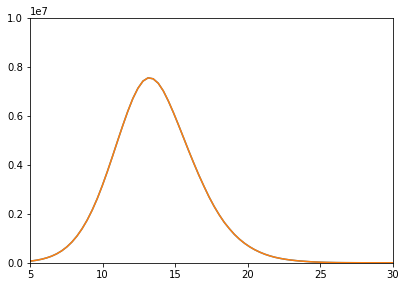

In [24]:
plt.figure()
center_80 = (tas_bins[:-1] + tas_bins[1:]) / 2
plt.plot(center_80,tas_hist_60)
plt.plot(center_80,tas_hist_80)
plt.xlim(5,30)
plt.ylim(0,10**7)

print(np.unique(tas_hist_60 - tas_hist_80))

<ipython-input-23-ee0d951bcc94>:105: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,10000000)


[0.7666666666666666, 0.13333333333333333, 0.3, 0.75]
[0.7666666666666666, 0.13333333333333333, 0.3, 0.75]


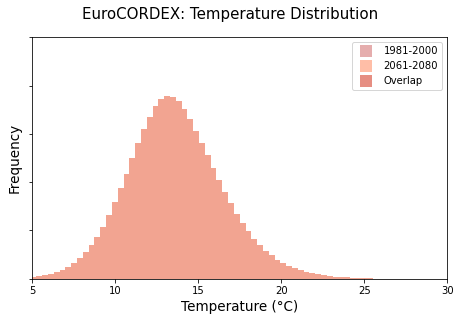

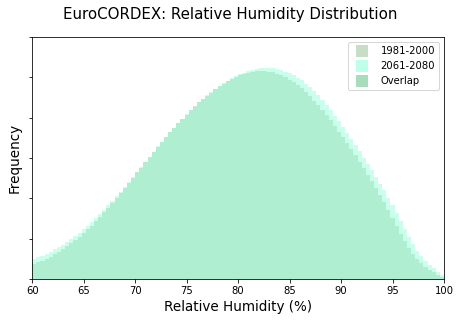

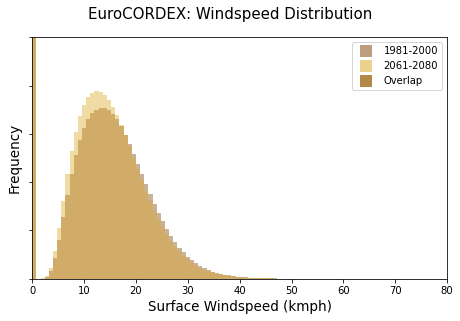

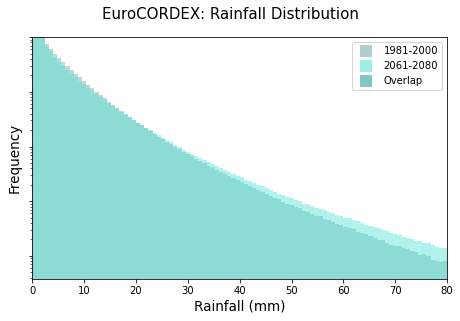

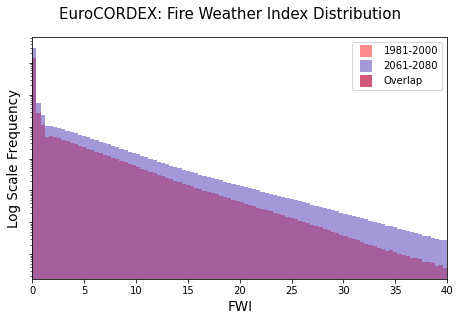

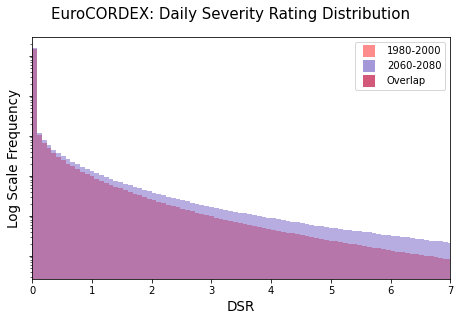

In [23]:
c1 = [205/255,92/255,92/255,255/(2*255)]   
c2 = [255/255,127/255,80/255,255/(2*255)]
c12 = mix_colors(c1,c2)

plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'EuroCORDEX: Temperature Distribution',fontsize=15)
width_80 = 1 * (tas_bins[1] - tas_bins[0])
center_80 = (tas_bins[:-1] + tas_bins[1:]) / 2
weights = np.ones_like(tas_hist_80)
ax.set_yscale('linear')
line_80 = ax.bar(center_80, tas_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax.set_ylabel('Frequency',fontsize=13.5)
ax.set_xlabel('Temperature (°C)',fontsize=13.5)
ax.set_ylim(0,10000000)
ax.set_xlim(5,30)
width_60 = 1 * (tas_bins[1] - tas_bins[0])
center_60 = (tas_bins[:-1] + tas_bins[1:]) / 2
weights = np.ones_like(tas_hist_60)
line_60 = ax.bar(center_60, tas_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax.legend([leg1, leg2, leg3], ['1981-2000', '2061-2080', 'Overlap'])
plt.tight_layout()
#plt.savefig('/home/theo/final_images/3.1.images/tas')



c1 = [143/255,188/255,143/255,255/(2*255)]   
c2 = [127/255,255/255,212/255,255/(2*255)]
c12 = mix_colors(c1,c2)

plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'EuroCORDEX: Relative Humidity Distribution',fontsize=15)
width_80 = 1 * (hur_bins[1] - hur_bins[0])
center_80 = (hur_bins[:-1] + hur_bins[1:]) / 2
weights = np.ones_like(hur_hist_80)
ax.set_yscale('linear')
line_80 = ax.bar(center_80, hur_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax.set_ylabel('Frequency',fontsize=13.5)
ax.set_xlabel('Relative Humidity (%)',fontsize=13.5)
ax.set_ylim(0,3000000)
ax.set_xlim(60,100)
width_60 = 1 * (hur_bins[1] - hur_bins[0])
center_60 = (hur_bins[:-1] + hur_bins[1:]) / 2
weights = np.ones_like(hur_hist_60)
line_60 = ax.bar(center_60, hur_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax.legend([leg1, leg2, leg3], ['1981-2000', '2061-2080', 'Overlap'])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/hurs')



c1 = [123/255,63/255,0/255,255/(2*255)]   
c2 = [218/255,165/255,32/255,255/(2*255)]
c12 = mix_colors(c1,c2)

plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'EuroCORDEX: Windspeed Distribution',fontsize=15)
width_80 = 1 * (wnd_bins[1] - wnd_bins[0])
center_80 = (wnd_bins[:-1] + wnd_bins[1:]) / 2
weights = np.ones_like(wnd_hist_80)
ax.set_yscale('linear')
line_80 = ax.bar(center_80, wnd_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax.set_ylabel('Frequency',fontsize=13.5)
ax.set_xlabel('Surface Windspeed (kmph)',fontsize=13.5)
ax.set_ylim(0,10000000)
ax.set_xlim(0,80)
width_60 = 1 * (wnd_bins[1] - wnd_bins[0])
center_60 = (wnd_bins[:-1] + wnd_bins[1:]) / 2
weights = np.ones_like(wnd_hist_60)
line_60 = ax.bar(center_60, wnd_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax.legend([leg1, leg2, leg3], ['1981-2000', '2061-2080', 'Overlap'])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/sfcWind')



c1 = [95/255,158/255,160/255,255/(2*255)]   
c2 = [64/255,224/255,208/255,255/(2*255)]
c12 = mix_colors(c1,c2)

plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'EuroCORDEX: Rainfall Distribution',fontsize=15)
width_80 = 1 * (prc_bins[1] - prc_bins[0])
center_80 = (prc_bins[:-1] + prc_bins[1:]) / 2
weights = np.ones_like(prc_hist_80)
ax.set_yscale('log',base=10)
line_80 = ax.bar(center_80, prc_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax.set_ylabel('Frequency',fontsize=13.5)
ax.set_xlabel('Rainfall (mm)',fontsize=13.5)
ax.set_ylim(0,10000000)
ax.set_xlim(0,80)
width_60 = 1 * (prc_bins[1] - prc_bins[0])
center_60 = (prc_bins[:-1] + prc_bins[1:]) / 2
weights = np.ones_like(prc_hist_60)
line_60 = ax.bar(center_60, prc_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax.legend([leg1, leg2, leg3], ['1981-2000', '2061-2080', 'Overlap'])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/pr')





c1 = [1.0, 0.1, 0.1, 0.5]
c2 = [0.3, 0.2, 0.7, 0.5]
c12 = mix_colors(c1,c2)
print(c12)
plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'EuroCORDEX: Fire Weather Index Distribution',fontsize=15)
width_80 = 1 * (fwi_bins[1] - fwi_bins[0])
center_80 = (fwi_bins[:-1] + fwi_bins[1:]) / 2
weights = np.ones_like(fwi_hist_80)/(length*8)
ax.set_yscale('log',base=10)
line_80 = ax.bar(center_80, fwi_hist_80*weights, align='center', width=width_80, color=c1)
ax.set_ylabel('Log Scale Frequency',fontsize=13.5)
ax.set_xlabel('FWI',fontsize=13.5)
ax.set_xlim(0,40)
width_60 = 1 * (fwi_bins[1] - fwi_bins[0])
center_60 = (fwi_bins[:-1] + fwi_bins[1:]) / 2
weights = np.ones_like(fwi_hist_60)/(length*8)
line_60 = ax.bar(center_60, fwi_hist_60*weights, align='center', width=width_60, color=c2)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax.legend([leg1, leg2, leg3], ['1981-2000', '2061-2080', 'Overlap'])
plt.tight_layout()
#plt.savefig('/home/theo/final_images/3.1.images/fwi')



c1 = [1.0, 0.1, 0.1, 0.5]
c2 = [0.3, 0.2, 0.7, 0.5]
c12 = mix_colors(c1,c2)
print(c12)
plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'EuroCORDEX: Daily Severity Rating Distribution',fontsize=15)
width_80 = 1 * (dsr_bins[1] - dsr_bins[0])
center_80 = (dsr_bins[:-1] + dsr_bins[1:]) / 2
weights = np.ones_like(dsr_hist_80)/(length*8)
ax.set_yscale('log',base=10)
line_80 = ax.bar(center_80, dsr_hist_80*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax.set_ylabel('Log Scale Frequency',fontsize=13.5)
ax.set_xlabel('DSR',fontsize=13.5)
ax.set_xlim(0,7)
width_60 = 1 * (dsr_bins[1] - dsr_bins[0])
center_60 = (dsr_bins[:-1] + dsr_bins[1:]) / 2
weights = np.ones_like(dsr_hist_60)/(length*8)
line_60 = ax.bar(center_60, dsr_hist_60*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax.legend([leg1, leg2, leg3], ['1980-2000', '2060-2080', 'Overlap'])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/dsr')

###### UKCP18:

In [10]:
tags = ['01','04','05','06','07','08','09','10','11','12','13','15']
#region_data  = xarray.open_dataset('/home/theo/data/ukcp18-uk-land-region-rll.nc')
#region_mask = region_data.admin_region
#region_mask = np.nan_to_num(region_mask)

tas_hist_80_ukcp = 0
hur_hist_80_ukcp = 0
wnd_hist_80_ukcp = 0
prc_hist_80_ukcp = 0
fwi_hist_80_ukcp = 0
dsr_hist_80_ukcp = 0

tas_hist_60_ukcp = 0
hur_hist_60_ukcp = 0
wnd_hist_60_ukcp = 0
prc_hist_60_ukcp = 0
fwi_hist_60_ukcp = 0
dsr_hist_60_ukcp = 0

# Loading Data:
for i in range(len(tags)): # files
    print(f'Model {i+1} of {len(tags)}')
    # Loading data
    tas_data  = xarray.open_dataset(f'/home/theo/data/ukcp18/tas_rcp85_ukcp18_natgb_{tags[i]}_day_19801201-20801130.nc')
    hurs_data = xarray.open_dataset(f'/home/theo/data/ukcp18/hurs_rcp85_ukcp18_natgb_{tags[i]}_day_19801201-20801130.nc')
    wind_data = xarray.open_dataset(f'/home/theo/data/ukcp18/sfcWind_rcp85_ukcp18_natgb_{tags[i]}_day_19801201-20801130.nc')
    pr_data   = xarray.open_dataset(f'/home/theo/data/ukcp18/pr_rcp85_ukcp18_natgb_{tags[i]}_day_19801201-20801130.nc')
    
    temperature = np.array(tas_data.tas[:,:,:,0])
    temperature = np.einsum('ijk,jk->ijk', temperature, mask)
    r_hum = np.array(hurs_data.hurs[:,:,:,0])
    r_hum = np.einsum('ijk,jk->ijk', r_hum, mask)
    wind = np.array(wind_data.sfcWind[:,:,:,0])*3.6
    wind = np.einsum('ijk,jk->ijk', wind, mask)
    rain = np.array(pr_data.pr[:,:,:,0])
    rain = np.einsum('ijk,jk->ijk', rain, mask)
    
    fwi = np.load(f'/data/met/fwi/ukcp18_new_fwi_{tags[i]}.npy')[0,:,:,:]
    fwi = np.einsum('ijk,jk->ijk', fwi, mask)
    dsr = 0.0272 * fwi ** 1.77
    dsr = np.einsum('ijk,jk->ijk', dsr, mask)
    length = temperature.shape[0]
    
    
    try:
        years = np.array(pd.to_datetime(np.array(hurs_data.time)).year)
        months = np.array(pd.to_datetime(np.array(hurs_data.time)).month)
    except:
        years = np.vectorize(lambda x: x.year)(np.array(hurs_data.time))
        months = np.vectorize(lambda x: x.month)(np.array(hurs_data.time))
        
    del tas_data,hurs_data,wind_data,pr_data
    
    # 1980-2000:
    year_inds = np.where(years <= 2000)
    summer_inds=np.concatenate((np.where(months == 6)[0],
                                np.where(months == 7)[0],
                                np.where(months == 8)[0]),
                                axis = 0)
    inds = np.intersect1d(year_inds,summer_inds)
    
    hist,tas_bins_ukcp = np.histogram(temperature[inds,:,:], bins=100, range=(0,35))
    tas_hist_80_ukcp = tas_hist_80_ukcp + hist
    del hist
    hist,hur_bins_ukcp = np.histogram(r_hum[inds,:,:], bins=100, range=(60,100))
    hur_hist_80_ukcp = hur_hist_80_ukcp + hist
    del hist
    hist,wnd_bins_ukcp = np.histogram(wind[inds,:,:], bins=100, range=(0,80))
    wnd_hist_80_ukcp = wnd_hist_80_ukcp + hist
    del hist
    hist,prc_bins_ukcp = np.histogram(rain[inds,:,:], bins=100, range=(0,80))
    prc_hist_80_ukcp = prc_hist_80_ukcp + hist
    del hist
    hist,fwi_bins_ukcp = np.histogram(fwi[inds,:,:], bins=100, range=(0,40))
    fwi_hist_80_ukcp = fwi_hist_80_ukcp + hist
    del hist
    hist,dsr_bins_ukcp = np.histogram(dsr[inds,:,:], bins=100, range=(0,8))
    dsr_hist_80_ukcp = dsr_hist_80_ukcp + hist
    del hist
    
    del year_inds,summer_inds,inds
    # 2060-2080:
    year_inds = np.where(years >= 2060)
    summer_inds=np.concatenate((np.where(months == 6)[0],
                                np.where(months == 7)[0],
                                np.where(months == 8)[0]),
                                axis = 0)
    inds = np.intersect1d(year_inds,summer_inds)

    hist,bins = np.histogram(temperature[inds,:,:], bins=100, range=(0,35))
    tas_hist_60_ukcp = tas_hist_60_ukcp + hist
    del hist,bins
    hist,bins = np.histogram(r_hum[inds,:,:], bins=100, range=(60,100))
    hur_hist_60_ukcp = hur_hist_60_ukcp + hist
    del hist,bins
    hist,bins = np.histogram(wind[inds,:,:], bins=100, range=(0,80))
    wnd_hist_60_ukcp = wnd_hist_60_ukcp + hist
    del hist,bins
    hist,bins = np.histogram(rain[inds,:,:], bins=100, range=(0,80))
    prc_hist_60_ukcp = prc_hist_60_ukcp + hist
    del hist,bins
    hist,bins = np.histogram(fwi[inds,:,:], bins=100, range=(0,40))
    fwi_hist_60_ukcp = fwi_hist_60_ukcp + hist
    del hist,bins
    hist,bins = np.histogram(dsr[inds,:,:], bins=100, range=(0,8))
    dsr_hist_60_ukcp = dsr_hist_60_ukcp + hist
    del hist,bins
    
    del year_inds,summer_inds,inds,temperature,r_hum,wind,rain,fwi,dsr
    print(f'FWI max bin is now: {np.max(fwi_hist_60_ukcp)}')

Model 1 of 12
FWI max bin is now: 23808189
Model 2 of 12
FWI max bin is now: 47695059
Model 3 of 12
FWI max bin is now: 71690004
Model 4 of 12
FWI max bin is now: 95212298
Model 5 of 12
FWI max bin is now: 119174979
Model 6 of 12
FWI max bin is now: 142778899
Model 7 of 12
FWI max bin is now: 166406039
Model 8 of 12
FWI max bin is now: 190086195
Model 9 of 12
FWI max bin is now: 214017777
Model 10 of 12
FWI max bin is now: 238072742
Model 11 of 12
FWI max bin is now: 261571742
Model 12 of 12
FWI max bin is now: 285379498


In [11]:
np.save('/home/theo/outdata/3.1.outdata/tas_hist_60_ukcp',tas_hist_60_ukcp )
np.save('/home/theo/outdata/3.1.outdata/hur_hist_60_ukcp',hur_hist_60_ukcp )
np.save('/home/theo/outdata/3.1.outdata/wnd_hist_60_ukcp',wnd_hist_60_ukcp )
np.save('/home/theo/outdata/3.1.outdata/prc_hist_60_ukcp',prc_hist_60_ukcp )
np.save('/home/theo/outdata/3.1.outdata/fwi_hist_60_ukcp',fwi_hist_60_ukcp )
np.save('/home/theo/outdata/3.1.outdata/dsr_hist_60_ukcp',dsr_hist_60_ukcp )

np.save('/home/theo/outdata/3.1.outdata/tas_hist_80_ukcp',tas_hist_80_ukcp)
np.save('/home/theo/outdata/3.1.outdata/hur_hist_80_ukcp',hur_hist_80_ukcp)
np.save('/home/theo/outdata/3.1.outdata/wnd_hist_80_ukcp',wnd_hist_80_ukcp)
np.save('/home/theo/outdata/3.1.outdata/prc_hist_80_ukcp',prc_hist_80_ukcp)
np.save('/home/theo/outdata/3.1.outdata/fwi_hist_80_ukcp',fwi_hist_80_ukcp)
np.save('/home/theo/outdata/3.1.outdata/dsr_hist_80_ukcp',dsr_hist_80_ukcp)

np.save('/home/theo/outdata/3.1.outdata/tas_bins_ukcp',tas_bins_ukcp)
np.save('/home/theo/outdata/3.1.outdata/hur_bins_ukcp',hur_bins_ukcp)
np.save('/home/theo/outdata/3.1.outdata/wnd_bins_ukcp',wnd_bins_ukcp)
np.save('/home/theo/outdata/3.1.outdata/prc_bins_ukcp',prc_bins_ukcp)
np.save('/home/theo/outdata/3.1.outdata/fwi_bins_ukcp',fwi_bins_ukcp)
np.save('/home/theo/outdata/3.1.outdata/dsr_bins_ukcp',dsr_bins_ukcp)

In [31]:
tas_hist_60_ukcp = np.load('/home/theo/outdata/3.1.outdata/tas_hist_60_ukcp.npy')
hur_hist_60_ukcp = np.load('/home/theo/outdata/3.1.outdata/hur_hist_60_ukcp.npy')
wnd_hist_60_ukcp = np.load('/home/theo/outdata/3.1.outdata/wnd_hist_60_ukcp.npy')
prc_hist_60_ukcp = np.load('/home/theo/outdata/3.1.outdata/prc_hist_60_ukcp.npy')
fwi_hist_60_ukcp = np.load('/home/theo/outdata/3.1.outdata/fwi_hist_60_ukcp.npy')
dsr_hist_60_ukcp = np.load('/home/theo/outdata/3.1.outdata/dsr_hist_60_ukcp.npy')

tas_hist_80_ukcp = np.load('/home/theo/outdata/3.1.outdata/tas_hist_80_ukcp.npy')
hur_hist_80_ukcp = np.load('/home/theo/outdata/3.1.outdata/hur_hist_80_ukcp.npy')
wnd_hist_80_ukcp = np.load('/home/theo/outdata/3.1.outdata/wnd_hist_80_ukcp.npy')
prc_hist_80_ukcp = np.load('/home/theo/outdata/3.1.outdata/prc_hist_80_ukcp.npy')
fwi_hist_80_ukcp = np.load('/home/theo/outdata/3.1.outdata/fwi_hist_80_ukcp.npy')
dsr_hist_80_ukcp = np.load('/home/theo/outdata/3.1.outdata/dsr_hist_80_ukcp.npy')

tas_bins_ukcp = np.load('/home/theo/outdata/3.1.outdata/tas_bins_ukcp.npy')
hur_bins_ukcp = np.load('/home/theo/outdata/3.1.outdata/hur_bins_ukcp.npy')
wnd_bins_ukcp = np.load('/home/theo/outdata/3.1.outdata/wnd_bins_ukcp.npy')
prc_bins_ukcp = np.load('/home/theo/outdata/3.1.outdata/prc_bins_ukcp.npy')
fwi_bins_ukcp = np.load('/home/theo/outdata/3.1.outdata/fwi_bins_ukcp.npy')
dsr_bins_ukcp = np.load('/home/theo/outdata/3.1.outdata/dsr_bins_ukcp.npy')

[0.7666666666666666, 0.13333333333333333, 0.3, 0.75]
[0.7666666666666666, 0.13333333333333333, 0.3, 0.75]


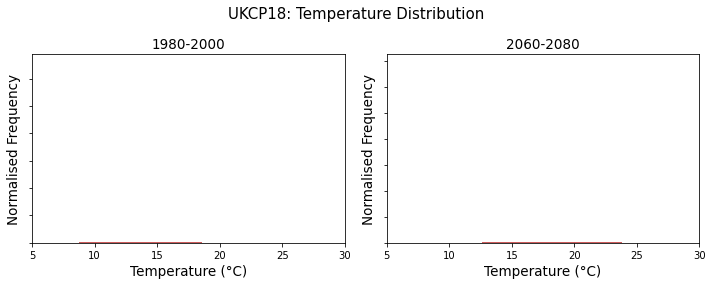

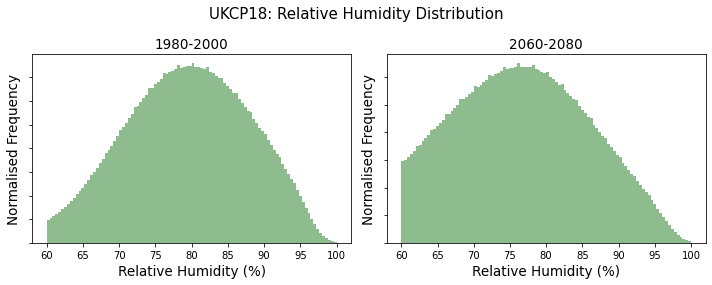

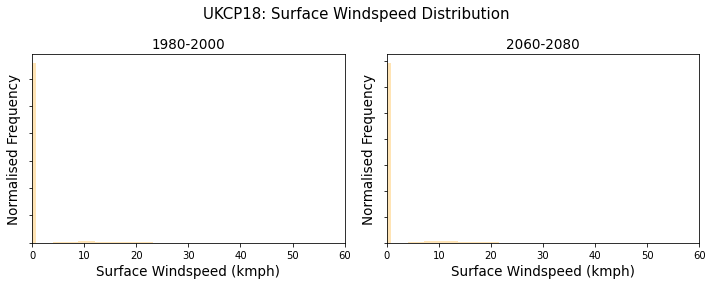

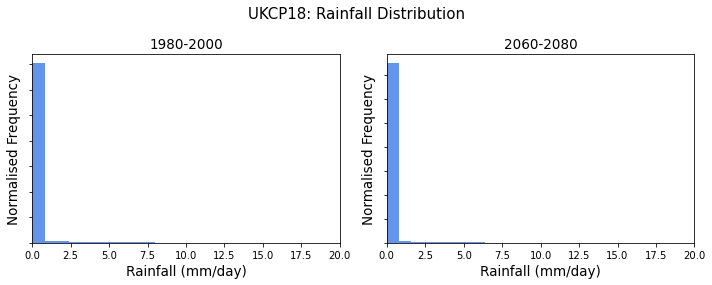

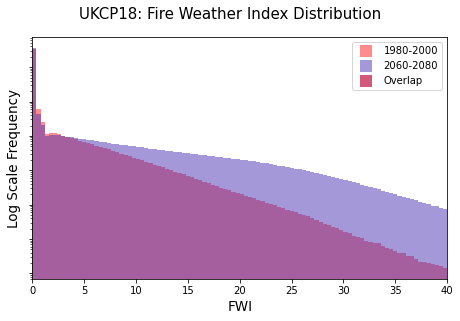

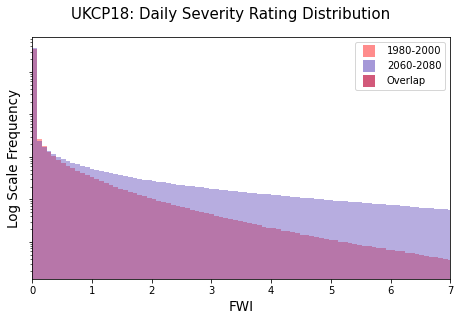

In [32]:
plt.rcParams["figure.figsize"] = (10,4)
fig,ax = plt.subplots(1,2)
fig.suptitle(f'UKCP18: Temperature Distribution',fontsize=15)
width_80 = 1 * (tas_bins_ukcp[1] - tas_bins_ukcp[0])
center_80 = (tas_bins_ukcp[:-1] + tas_bins_ukcp[1:]) / 2
weights = np.ones_like(tas_hist_80_ukcp)/(length*8)
ax[0].plot()
ax[0].set_yscale('linear')
ax[0].bar(center_80, tas_hist_80_ukcp*weights, align='center', width=width_80, color='indianred')
ax[0].set_ylabel('Normalised Frequency',fontsize=13.5)
ax[0].set_xlabel('Temperature (°C)',fontsize=13.5)
ax[0].set_title('1980-2000',fontsize=13.5)
ax[0].set_xlim(5,30)
width_60 = 1 * (tas_bins_ukcp[1] - tas_bins_ukcp[0])
center_60 = (tas_bins_ukcp[:-1] + tas_bins_ukcp[1:]) / 2
weights = np.ones_like(tas_hist_60_ukcp)/(length*8)
ax[1].plot()
ax[1].set_yscale('linear')
ax[1].bar(center_60, tas_hist_60_ukcp*weights, align='center', width=width_60, color='indianred')
ax[1].set_ylabel('Normalised Frequency',fontsize=13.5)
ax[1].set_xlabel('Temperature (°C)',fontsize=13.5)
ax[1].set_title('2060-2080',fontsize=13.5)
ax[1].set_xlim(5,30)
ax[0].set_yticklabels([])
ax[1].set_yticklabels([])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/tas_ukcp')




plt.rcParams["figure.figsize"] = (10,4)
fig,ax = plt.subplots(1,2)
fig.suptitle(f'UKCP18: Relative Humidity Distribution',fontsize=15)
width_80 = 1 * (hur_bins_ukcp[1] - hur_bins_ukcp[0])
center_80 = (hur_bins_ukcp[:-1] + hur_bins_ukcp[1:]) / 2
weights = np.ones_like(hur_hist_80_ukcp)/(length*8)
ax[0].plot()
ax[0].set_yscale('linear')
ax[0].bar(center_80, hur_hist_80_ukcp*weights, align='center', width=width_80, color='darkseagreen')
ax[0].set_ylabel('Normalised Frequency',fontsize=13.5)
ax[0].set_xlabel('Relative Humidity (%)',fontsize=13.5)
ax[0].set_title('1980-2000',fontsize=13.5)
width_60 = 1 * (hur_bins_ukcp[1] - hur_bins_ukcp[0])
center_60 = (hur_bins_ukcp[:-1] + hur_bins_ukcp[1:]) / 2
weights = np.ones_like(hur_hist_60_ukcp)/(length*8)
ax[1].plot()
ax[1].set_yscale('linear')
ax[1].bar(center_60, hur_hist_60_ukcp*weights, align='center', width=width_60, color='darkseagreen')
ax[1].set_ylabel('Normalised Frequency',fontsize=13.5)
ax[1].set_xlabel('Relative Humidity (%)',fontsize=13.5)
ax[1].set_title('2060-2080',fontsize=13.5)
ax[0].set_yticklabels([])
ax[1].set_yticklabels([])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/hurs_ukcp')




plt.rcParams["figure.figsize"] = (10,4)
fig,ax = plt.subplots(1,2)
fig.suptitle(f'UKCP18: Surface Windspeed Distribution',fontsize=15)
width_80 = 1 * (wnd_bins_ukcp[1] - wnd_bins_ukcp[0])
center_80 = (wnd_bins_ukcp[:-1] + wnd_bins_ukcp[1:]) / 2
weights = np.ones_like(wnd_hist_80_ukcp)/(length*8)
ax[0].plot()
ax[0].set_yscale('linear')
ax[0].bar(center_80, wnd_hist_80_ukcp*weights, align='center', width=width_80, color='moccasin')
ax[0].set_ylabel('Normalised Frequency',fontsize=13.5)
ax[0].set_xlabel('Surface Windspeed (kmph)',fontsize=13.5)
ax[0].set_title('1980-2000',fontsize=13.5)
ax[0].set_xlim(0,60)
width_60 = 1 * (wnd_bins_ukcp[1] - wnd_bins_ukcp[0])
center_60 = (wnd_bins_ukcp[:-1] + wnd_bins_ukcp[1:]) / 2
weights = np.ones_like(wnd_hist_60_ukcp)/(length*8)
ax[1].plot()
ax[1].set_yscale('linear')
ax[1].bar(center_60, wnd_hist_60_ukcp*weights, align='center', width=width_60, color='moccasin')
ax[1].set_ylabel('Normalised Frequency',fontsize=13.5)
ax[1].set_xlabel('Surface Windspeed (kmph)',fontsize=13.5)
ax[1].set_title('2060-2080',fontsize=13.5)
ax[1].set_xlim(0,60)
ax[0].set_yticklabels([])
ax[1].set_yticklabels([])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/sfcWind_ukcp')




plt.rcParams["figure.figsize"] = (10,4)
fig,ax = plt.subplots(1,2)
fig.suptitle(f'UKCP18: Rainfall Distribution',fontsize=15)
width_80 = 1 * (prc_bins_ukcp[1] - prc_bins_ukcp[0])
center_80 = (prc_bins_ukcp[:-1] + prc_bins_ukcp[1:]) / 2
weights = np.ones_like(prc_hist_80_ukcp)/(length*8)
ax[0].plot()
ax[0].set_yscale('linear')
ax[0].bar(center_80, prc_hist_80_ukcp*weights, align='center', width=width_80, color='cornflowerblue')
ax[0].set_ylabel('Normalised Frequency',fontsize=13.5)
ax[0].set_xlabel('Rainfall (mm/day)',fontsize=13.5)
ax[0].set_title('1980-2000',fontsize=13.5)
ax[0].set_xlim(0,20)
width_60 = 1 * (prc_bins_ukcp[1] - prc_bins_ukcp[0])
center_60 = (prc_bins_ukcp[:-1] + prc_bins_ukcp[1:]) / 2
weights = np.ones_like(prc_hist_60_ukcp)/(length*8)
ax[1].plot()
ax[1].set_yscale('linear')
ax[1].bar(center_60, prc_hist_60_ukcp*weights, align='center', width=width_60, color='cornflowerblue')
ax[1].set_ylabel('Normalised Frequency',fontsize=13.5)
ax[1].set_xlabel('Rainfall (mm/day)',fontsize=13.5)
ax[1].set_title('2060-2080',fontsize=13.5)
ax[1].set_xlim(0,20)
ax[0].set_yticklabels([])
ax[1].set_yticklabels([])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/prc_ukcp')




c1 = [1.0, 0.1, 0.1, 0.5]
c2 = [0.3, 0.2, 0.7, 0.5]
c12 = mix_colors(c1,c2)
print(c12)
plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'UKCP18: Fire Weather Index Distribution',fontsize=15)
width_80 = 1 * (fwi_bins_ukcp[1] - fwi_bins_ukcp[0])
center_80 = (fwi_bins_ukcp[:-1] + fwi_bins_ukcp[1:]) / 2
weights = np.ones_like(fwi_hist_80_ukcp)/(length*8)
ax.set_yscale('log',base=10)
line_80 = ax.bar(center_80, fwi_hist_80_ukcp*weights, align='center', width=width_80, color=c1)
ax.set_ylabel('Log Scale Frequency',fontsize=13.5)
ax.set_xlabel('FWI',fontsize=13.5)
ax.set_xlim(0,40)
width_60 = 1 * (fwi_bins_ukcp[1] - fwi_bins_ukcp[0])
center_60 = (fwi_bins_ukcp[:-1] + fwi_bins_ukcp[1:]) / 2
weights = np.ones_like(fwi_hist_60_ukcp)/(length*8)
line_60 = ax.bar(center_60, fwi_hist_60_ukcp*weights, align='center', width=width_60, color=c2)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax.legend([leg1, leg2, leg3], ['1980-2000', '2060-2080', 'Overlap'])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/fwi_ukcp')



c1 = [1.0, 0.1, 0.1, 0.5]
c2 = [0.3, 0.2, 0.7, 0.5]
c12 = mix_colors(c1,c2)
print(c12)
plt.rcParams["figure.figsize"] = (6.5,4.5)
fig,ax = plt.subplots()
fig.suptitle(f'UKCP18: Daily Severity Rating Distribution',fontsize=15)
width_80 = 1 * (dsr_bins_ukcp[1] - dsr_bins_ukcp[0])
center_80 = (dsr_bins_ukcp[:-1] + dsr_bins_ukcp[1:]) / 2
weights = np.ones_like(dsr_hist_80_ukcp)/(length*8)
ax.set_yscale('log',base=10)
line_80 = ax.bar(center_80, dsr_hist_80_ukcp*weights, align='center', width=width_80, color=c1,alpha=0.4)
ax.set_ylabel('Log Scale Frequency',fontsize=13.5)
ax.set_xlabel('FWI',fontsize=13.5)
ax.set_xlim(0,7)
width_60 = 1 * (dsr_bins_ukcp[1] - dsr_bins_ukcp[0])
center_60 = (dsr_bins_ukcp[:-1] + dsr_bins_ukcp[1:]) / 2
weights = np.ones_like(dsr_hist_60_ukcp)/(length*8)
line_60 = ax.bar(center_60, dsr_hist_60_ukcp*weights, align='center', width=width_60, color=c2,alpha=0.4)
ax.set_yticklabels([])
leg1 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c1, markeredgewidth=0)
leg2 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c2, markeredgewidth=0)
leg3 = lines.Line2D([0], [0], linestyle='none', marker='s', markersize=12, markerfacecolor=c12,markeredgewidth=0)
ax.legend([leg1, leg2, leg3], ['1980-2000', '2060-2080', 'Overlap'])
plt.tight_layout()
plt.savefig('/home/theo/final_images/3.1.images/dsr_ukcp')